# Tarea semanal 1
### Alumna: Purpura Salerno, Fiamma
#### Entrega: 28 de abril del 2021

### Introducción
En el marco de la materia Teoría de los Circuitos 2, a los alumnos se les entrega unos ejercicios para practicar los contenidos aprendidos en clase y reforzar estos mismos. 

### Ejercicio

La tarea propuesta para esta ocasión consiste en el siguiente circuito: 

![Imagen](descarga.png)

Donde a los alumnos se les pide: 

1. Obtener la función transferencia V2/V1 ( módulo , fase y diagrama de polos y ceros).
2. Obtenga la función transferencia, pero normalizada. ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?
3. Simule la función transferencia normalizada (Python, Matlab, etc.).
4. Simule el circuito y obtenga la respuesta en frecuencia pedida en 1), para los valores:  R2/R1=1; R3=1kΩ y C=1µF
5. ¿Qué utilidad podría tener este tipo de circuitos pasa-todo?

### Punto 1
#### Cálculo de la transferencia
Tomando el siguiente sentido de las corrientes: 

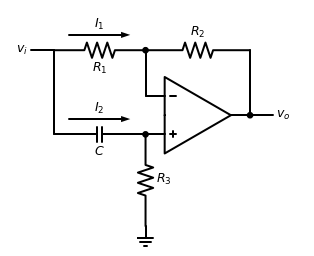

In [55]:
from IPython.display import HTML
from IPython.display import display

tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d += (op := elm.Opamp(leads=True))
    #d += elm.Line().down(d.unit/4).at(op.in2)
    #d += 
    d += (R3 := elm.Resistor().at(op.in2).down().idot().label('$R_{3}$', loc='bot'))
    d += elm.Ground()
    d += (C := elm.Capacitor().at(op.in2).left().label('$C$', loc='bot'))
    d += elm.Line().up(2.75)
    d += (R1 := elm.Resistor().right().label('$R_{1}$', loc='bot'))
    d += elm.Dot()
    #d += elm.Line().left(1)
    d += elm.Line().up(d.unit/2).at(op.in1)
    d += (R2 := elm.Resistor().tox(op.out).label('$R_2$'))
    d += elm.Line().toy(op.out).dot()
    d += elm.Line().right(d.unit/4).at(op.out).label('$v_{o}$', loc='right')
    d += elm.CurrentLabel(top=True, ofst=.5).at(R1).label('$I_1$')
    d += elm.CurrentLabel(top=True, ofst=.5).at(C).label('$I_2$')
    d += elm.Line().left(d.unit/4).at(R1.start).label('$v_{i}$', loc='left')

Tenemos que la tension Vo es igual a: 
 
(I) $V_{o} = V_{R2} + V_{R3} = - R_{2} * I_{1}(s) + R_{3} * I_{2}(s) $ 

Y Vi es igual a: 

(II) $V_{i} = V_{C} + V_{R3} = \frac{1}{s . C} * I_{2}(s) + R_{3} * I_{2}(s) = I_{2}(s) * (  \frac{1}{s . C} +  R_{3} )  $

Considerando que en R1 y en el capacitor tiene que caer la misma tensión, se tiene que: 

 $ V_{R1} = V_{C} $

$ R_{1} * I_{1}(s) = \frac{1}{s . C} * I_{2}(s) $

(III)$ I_{1}(s) = \frac{1}{s . C . R_{1}} * I_{2}(s) $

Juntando las ecuaciones (I) y (III), queda que: 

$V_{o} = - R_{2} *  \frac{1}{s . C . R_{1}} * I_{2}(s) + R_{3} * I_{2}(s) $

$V_{o} = I_{2}(s) * ( R_{3} - R_{2} *  \frac{1}{s . C . R_{1}} )  $

(IV) $V_{o} = I_{2}(s) * (  \frac{ R_{3} . s . C . R_{1} - R_{2}}{s . C . R_{1}} )  $

Y al dividir la ecuación (IV) con la (II) se obtiene: 

$\frac{V_{o}}{V_{i}} = \frac{I_{2}(s) * (  \frac{ R_{3} . s . C . R_{1} - R_{2}}{s . C . R_{1}} )}{I_{2}(s) * (  \frac{1}{s . C} +  R_{3})} = 
 \frac{I_{2}(s) * \frac{1}{sC}( R_{3}. s . C - \frac{R_{2}}{ R_{1}} )}
{I_{2}(s) * \frac{1}{sC} (  1 +  R_{3} . s . C)}= 
\frac{( R_{3}. s . C - \frac{R_{2}}{ R_{1}} )}{(  1 +  R_{3} . s . C)}$

Con lo que queda: 

(V) $\frac{V_{o}}{V_{i}} = \frac{s - \frac{R_{2}}{R_{1}.R_{3}.C}}{ s + \frac{1}{R_{3}.C}} $

#### Diagrama de polos y ceros

Observando la transferencia, se obtienen el siguiente diagrama de polos y ceros: 

<img src="PolosYCeros.jpeg" style="height:250px"> 



#### Módulo y fase


(VI) $ |H(j\omega)| = \frac{|P(j\omega)|}{|R(j\omega)|} =  \frac{ \sqrt{\omega^{2} + (\frac{R_{2}}{R_{1}.R_{3}.C})^{2}}} { \sqrt{\omega^{2} + (\frac{1}{R_{3}.C})^{2}}} $

(VII) $ \phi(H(\omega)) =  \phi(P(\omega)) -  \phi(R(\omega)) = arctg (\frac{\omega}{-\frac{R_{2}}{R_{1}.R_{3}.C}}) - arctag (\frac{\omega}{\frac{1}{C . R_{3}}}) $

De esta forma, el los diagramas de módulo y fase quedan de la siguiente manera: 

<img src="ModuloYFase.jpeg" style="height:250px"> 

Ambos fueron obtenidos mediante el método gráfico. Para obtener el gráfico del módulo, se tomó que R1 = R2, ya que de esta forma el cociente de los módulos siempre iba a dar 1, ya que se encuentran a igual distancia del eje $j \omega$. De otra forma, el módulo sería siempre $\frac{R_{2}}{R_{1}}$.

Para sacar la fase, se empezó desde $\omega = 0$, de forma que restando el ángulo que da del eje hasta el cero y el que queda entre el polo y el eje, resulta $ \phi(\omega = 0 ) = \frac{\pi}{2} $. A continuación se buscó la fase en con omega infinito. En ese punto, al estar tan lejos del polo y del cero, parece que ambos tuvieran el mismo valor de fase, entonces, restar dos magnitudes iguales devulve 0. A este punto, quedaba resolver que pasaba en el medio. Tomando un omega igual a $\frac{1}{R_{3} . C}$, se obtiene que el ángulo entre ese punto del eje y el polo es $\frac{\pi}{4}$, y el ángulo entre el punto y el cero es $\frac{3 . \pi}{4}$, con lo cual la resta da $\frac{\pi}{2}$. 

#### Verificación mediante Python



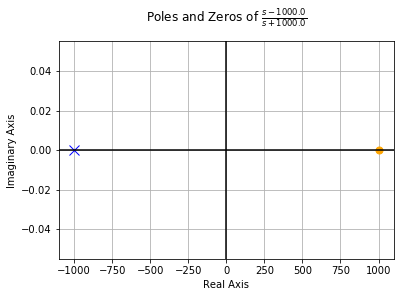

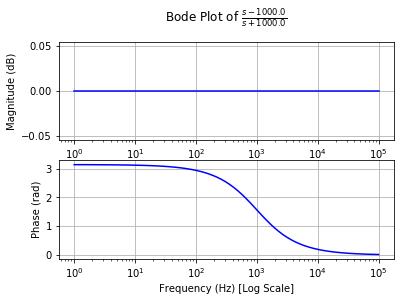

In [30]:
from sympy.abc import s
from sympy.abc import r
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
from sympy.physics.control.control_plots import bode_plot

R2 = 1000

#Tomamos los valores que nos dan en el ejercicio 4, para que Python pueda simular
R1 = R2
R3 = 1000
C = 0.000001

#Armamos la función transferencia, ...
tf1  = TransferFunction( s -(R2)/(R1*R3*C), s + (1)/(R3*C), s )
# luego el diagrama de polos y ceros...
pole_zero_plot(tf1)   
# ... y finalmente el gráfico de módulo y fase.
bode_plot(tf1 , initial_exp=0, final_exp=5)   


Puede al lector resultar llamativo que se haya dicho que el módulo siempre iba a valer 1 y que en la simulación esté en 0, pero eso es porque la función bode_plot(...) grafica en escala logarítmica, y el logaritmo de 1 siempre va a valer 0, por lo cual, verifica lo que se dijo anteriormente. 

Otro punto a destacar es que en el gráfico de la fase, se puede notar que para $\omega = 1000 = \frac{1}{R_{3}.C}$ la función se encuentra en $\frac{\pi}{2}$.

### Punto 2

Para la normalización tomamos que R1 = R2, con lo cual, la transfrencia queda como: 

(VIII) $\frac{V_{o}}{V_{i}} = \frac{s - \frac{1}{R_{3}.C}}{ s + \frac{1}{R_{3}.C}} $

Tomando entonces la normalización: $\frac{1}{R_{3}.C} = A$, la función transferencia queda de la siguiente manera: 

(IX) $\frac{V_{o}}{V_{i}} = \frac{s - A}{ s + A} $

Tomando entonces s= s* . A, la ecuación (XI) queda: 

$\frac{V_{o}}{V_{i}} = \frac{s*. A - A}{ s*.A + A} $

$\frac{V_{o}}{V_{i}} = \frac{ A . (s* - 1)}{A . ( s* + 1)} $

(X)$\frac{V_{o}}{V_{i}} = \frac{ s* - 1}{s* + 1} $

### Punto 3


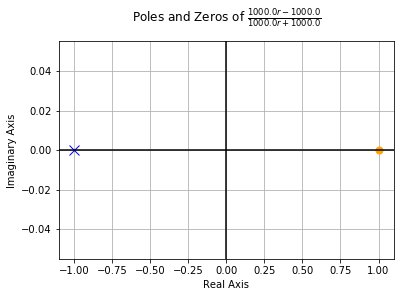

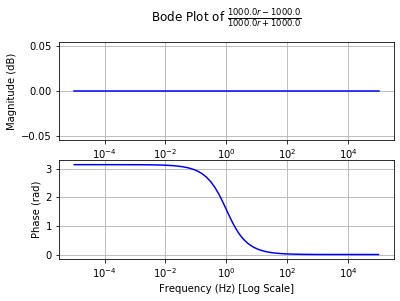

In [34]:
A = (1)/(R3*C)
s = r * A

#Armamos la función transferencia, ...
tf2  = TransferFunction( s - A, s + A, r )
# luego el diagrama de polos y ceros...
pole_zero_plot(tf2)   
# ... y finalmente el gráfico de módulo y fase.
bode_plot(tf2 , initial_exp=-5, final_exp=5)   

Como se ve, conserva el comportamiento graficado en el inciso 1, solo que en caso de la fase, el punto de inflexíon es en 1, ya que la normalización impone un desfazaje, pero el comportamiento de las funciones es el mismo. 

### Punto 4

Para la simulación del circuito, quien escribe utilizó LTSpice. El dibujo de este queda de la siguiente forma: 

<img src="LTSpice_0.png"> 

La respuesta obtenida se ve en el gráfico inferior. Puede observarse que para frecencias mayores de las unidades de megahertz deja de tener el comportamiento calculado previamente y empieza a atenuar la señal. Esto puede deberse a que los componentes no son perfectos y una vez alcanzadas las altas frecuencias no se comportan como se desería. 

A su vez, se observa que 

También, quien escribe este trabajo intentó valores de las resistencias 1 y 2 que satisfagan más el comportamiento de un filtro pasa todo, con lo que considerando resistencias muy chicas, se obtuvo lo siguiente:

<img src="LTSpice.png"> 

Como se puede observar, la curva sigue presente, solo que una vez que pasa la misma, atenua unos 1.2dB, con lo cual la diferencia del comportamiento es menor. A pesar de esto, no resulta conveninte tener semejante diferencia de valores entre componentes. 

### Punto 5